# Imports

In [1]:
# !pip3 uninstall umap-learn
# !pip3 install 'umap-learn==0.3.10'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
import pickle

import umap
from sklearn.datasets import fetch_openml

In [ ]:
# tf.__version__

In [6]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# 1.st training image

In [ ]:
# print(x_train[0])

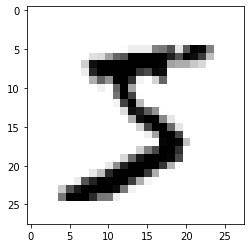

In [ ]:
plt.imshow(x_train[0], cmap=plt.cm.binary)  # plot image in black and white
plt.show()

# Normalize x in order to optimize the DNN

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
# print(x_train[0])

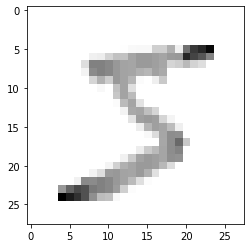

In [ ]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
# feed forward (CNN) model
model = tf.keras.models.Sequential()

In [ ]:
# Input layer. Flatten 28x28 into 1x784
model.add(tf.keras.layers.Flatten())

In [ ]:
# Add 2 hidden layers. Use Rectified linear activation function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

In [ ]:
# Output layer w. 1 node per possible number prediction
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fit the model with the training data
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2552 - accuracy: 0.9258
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1044 - accuracy: 0.9678
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0720 - accuracy: 0.9770


In [ ]:
# Test the model
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1025 - accuracy: 0.9699
0.10246632993221283
0.9699000120162964


In [ ]:
# Save the model
model.save('mnist_classifier.model')

In [ ]:
# Load model again
new_model = tf.keras.models.load_model('mnist_classifier.model')

In [ ]:
# Predict
predictions = new_model.predict(x_test)

In [ ]:
print(predictions)

[[4.6150954e-09 3.1900711e-07 4.3494765e-06 ... 9.9996960e-01
  2.7815284e-08 5.8770598e-07]
 [8.8949337e-10 3.1748146e-03 9.9677151e-01 ... 3.8612512e-08
  1.9322906e-07 6.6083948e-12]
 [6.1295395e-08 9.9932885e-01 7.6020820e-06 ... 6.7446650e-05
  5.3629914e-04 1.5920734e-06]
 ...
 [6.2418316e-08 3.4493785e-06 1.0737421e-07 ... 1.8985856e-04
  3.5864803e-05 1.3456845e-03]
 [1.6799919e-06 5.9334504e-08 2.1266992e-07 ... 2.0180100e-06
  1.3585096e-03 5.3891891e-09]
 [9.6596591e-07 1.2656621e-07 3.3856598e-09 ... 2.3572672e-10
  1.6469071e-09 3.6775411e-08]]


In [ ]:
print(np.argmax(predictions[0]))

7


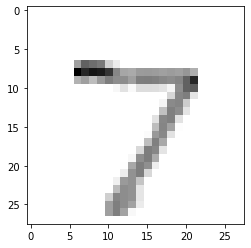

In [ ]:
# Compare with input
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

# t-SNE

# Reshape data

In [ ]:
# https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html
x_mnist = np.reshape(x_train, [x_train.shape[0], x_train.shape[1]*x_train.shape[2]])
print(x_mnist.shape)

(60000, 784)


In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)  # m = TSNE(learning_rate=50)

In [ ]:
# Warning: this takes ~25-30 mins. pickle.load model after 1st training
# z = tsne.fit_transform(x_mnist)

df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.039s...
[t-SNE] Computed neighbors for 60000 samples in 243.893s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for s

[Text(0.5, 1.0, 'MNIST data T-SNE projection')]

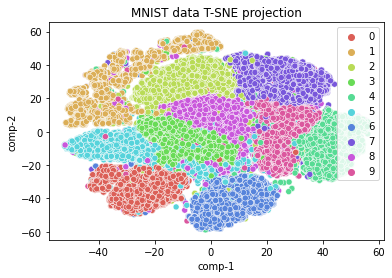

In [ ]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data T-SNE projection")

In [ ]:
# plt.show()

In [ ]:
# https://stackabuse.com/how-to-pickle-and-unpickle-objects-in-python/
pickle.dump(z, open('tsne_model.txt', 'wb'))

# TODO: write pickled model to Google Drive

In [ ]:
# from google.colab import drive

In [ ]:
# drive.mount('/drive')

In [ ]:
# outfile = '/drive/My Drive/tsne_model.txt'

# UMAP

In [ ]:
# https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

In [3]:
sns.set(context="paper", style="white")

In [ ]:
# mnist = fetch_openml("mnist_784", version=1)

In [4]:
reducer = umap.UMAP(random_state=42)

In [ ]:
# overwrite mnist with sklearn mnist

In [7]:
embedding = reducer.fit_transform(mnist.data)

AttributeError: ignored

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))

color = mnist.target.astype(int)
plt.scatter(embedding[:, 0], embedding[:, 1], c=color, cmap="Spectral", s=0.1)
plt.setp(ax, xticks=[], yticks=[])
plt.title("MNIST UMAP", fontsize=18)

plt.show()